In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import functions as func

In [2]:
# read in csv file and creating an original df which we wont change. dropping certain unnecessary columns and renaming the necessary columns.

csv_file_path = r'..\Data\GDP_growth\real-gdp-growth.csv'
df_gdp_rate_original = pd.read_csv(csv_file_path)
df_gdp_rate = df_gdp_rate_original.copy()
df_gdp_rate = df_gdp_rate.drop(columns=['Gross domestic product, constant prices - Percent change - Forecasts'])
df_gdp_rate.rename(columns={'Entity': 'country', 'Gross domestic product, constant prices - Percent change - Observations' : 'gdp_change_%', 'Year' : 'year'}, inplace=True)

In [3]:
# Because the education dataset only has data per 5 years we change the Gdp set to 5 years intervals. We adjust the change in rate to sum up all increases so we have te correct data.

df_gdp_rate['year'] = df_gdp_rate['year'] // 5 * 5
df_gdp_rate = df_gdp_rate.groupby(['country', 'year']).agg({'gdp_change_%': 'sum'}).reset_index()

In [4]:
# read in csv file and creating an original df which we wont change. Dropping unnecessary columns.

csv_file_path = r'..\Data\Education\OUP_long_MF2564_v1.csv'
df_edu_original = pd.read_csv(csv_file_path)
df_edu = df_edu_original.copy()
df_edu = df_edu.drop(columns=['BLcode', 'WBcode' , 'region_code', 'sex', 'agefrom', 'ageto'] , errors='ignore')

# Calling on function that calculates percentage change for the education set columns
df_edu = func.edu_perc(df_edu)

# Since data from gdp only goes back to 1980 we start our education set at 1980
df_edu = df_edu[df_edu['year'] >= 1980]
df_edu.head()

,year,country,lu,lp,lp_%,lpc,lpc_%,ls,lsc,lsc_%,...,yr_sch,yr_sch_%,yr_sch_pri,yr_sch_pri_%,yr_sch_sec,yr_sch_sec_%,yr_sch_ter,yr_sch_ter_%,pop,pop_%
22,1980,Australia,0.9,6.9,-50.359712,3.5,-52.054795,69.7,51.5,14.190687,...,11.00,6.796117,5.84,1.565217,4.42,14.211886,0.74,8.823529,6978,10.551331
23,1985,Australia,1.0,7.1,2.898551,3.4,-2.857143,66.1,52.1,1.165049,...,11.30,2.727273,5.82,-0.342466,4.63,4.751131,0.85,14.864865,7709,10.475781
24,1990,Australia,1.1,7.9,11.267606,3.7,8.823529,63.2,52.9,1.535509,...,11.52,1.946903,5.81,-0.171821,4.79,3.455724,0.92,8.235294,8563,11.077961
25,1995,Australia,1.1,8.2,3.797468,4.0,8.108108,61.6,54.0,2.079395,...,11.72,1.736111,5.81,0.000000,4.95,3.340292,0.96,4.347826,9283,8.408268
26,2000,Australia,0.9,8.7,6.097561,4.5,12.500000,63.5,57.7,6.851852,...,11.64,-0.682594,5.82,0.172117,4.93,-0.404040,0.89,-7.291667,10092,8.714855


In [5]:
# Merging Gdp and Education data sets on country and year, dropping unnecessary columns. Also resetting the index on country

merged_df = pd.merge(df_gdp_rate, df_edu, on=['country', 'year'], how='inner')
merged_df = merged_df.drop(columns=['BLcode', 'WBcode' , 'region_code', 'sex', 'Code'] , errors='ignore')
pd.set_option('display.max_columns', None)
merged_df.set_index('country', inplace=True)
merged_df.head(10)

,year,gdp_change_%,lu,lp,lp_%,lpc,lpc_%,ls,lsc,lsc_%,lh,lhc,lhc_%,yr_sch,yr_sch_%,yr_sch_pri,yr_sch_pri_%,yr_sch_sec,yr_sch_sec_%,yr_sch_ter,yr_sch_ter_%,pop,pop_%
country,,,,,,,,,,,,,,,,,,,,,,,
Albania,1980,14.384,27.0,30.4,-9.253731,22.5,-5.462185,37.2,15.2,35.714286,5.4,3.3,32.000000,5.51,26.376147,3.33,31.102362,2.01,18.934911,0.17,30.769231,1001,16.939252
Albania,1985,11.700,18.9,25.9,-14.802632,19.4,-13.777778,49.2,20.8,36.842105,6.0,4.0,21.212121,6.81,23.593466,4.19,25.825826,2.42,20.398010,0.20,17.647059,1175,17.382617
Albania,1990,-26.200,12.8,22.3,-13.899614,17.0,-12.371134,58.3,25.7,23.557692,6.6,4.4,10.000000,7.91,16.152717,5.15,22.911695,2.55,5.371901,0.22,10.000000,1395,18.723404
Albania,1995,28.796,15.4,16.0,-28.251121,12.7,-25.294118,61.9,27.0,5.058366,6.6,4.4,0.000000,8.15,3.034134,5.41,5.048544,2.52,-1.176471,0.22,0.000000,1415,1.433692
Albania,2000,30.820,0.6,14.9,-6.875000,12.5,-1.574803,76.6,33.1,22.592593,8.0,5.4,22.727273,9.85,20.858896,6.57,21.441774,3.01,19.444444,0.27,22.727273,1399,-1.130742
Albania,2005,28.266,1.1,9.2,-38.255034,8.5,-32.000000,85.0,38.5,16.314199,4.8,3.2,-40.740741,10.20,3.553299,6.97,6.088280,3.07,1.993355,0.16,-40.740741,1444,3.216583
Albania,2010,10.446,1.5,4.2,-54.347826,4.1,-51.764706,92.4,46.8,21.558442,1.9,1.2,-62.500000,10.55,3.431373,7.32,5.021521,3.17,3.257329,0.06,-62.500000,1540,6.648199
Algeria,1980,15.000,67.7,23.6,33.333333,3.7,15.625000,7.7,5.4,58.823529,1.0,0.6,100.000000,1.91,44.696970,1.34,39.583333,0.54,58.823529,0.03,50.000000,5793,21.829653
Algeria,1985,7.600,58.0,29.5,25.000000,10.5,183.783784,10.4,7.6,40.740741,2.1,1.3,116.666667,2.81,47.120419,1.95,45.522388,0.79,46.296296,0.07,133.333333,6881,18.781288


In [6]:
# Checking for null and if value which will be problematic for calculations/visualization later.
print(merged_df['gdp_change_%'].isnull().sum())
print(np.isinf(merged_df['gdp_change_%']).sum())

print(merged_df['lhc_%'].isnull().sum())
print(np.isinf(merged_df['lhc_%']).sum())

0
0
1
1


In [12]:
# First correlation check with percentage of people who finished primary school against gdp growth.

merged_df.dropna(subset=['gdp_change_%', 'lpc_%'], inplace=True)
merged_df = merged_df[~np.isinf(merged_df['lpc_%'])]

correlation = merged_df['lpc_%'].corr(merged_df['gdp_change_%'])
print(correlation)

0.0748930893056536


                            OLS Regression Results                            
Dep. Variable:                  lpc_%   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.091
Date:                Wed, 06 Mar 2024   Prob (F-statistic):             0.0793
Time:                        16:57:14   Log-Likelihood:                -2731.3
No. Observations:                 550   AIC:                             5467.
Df Residuals:                     548   BIC:                             5475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4152      2.228     -0.635   

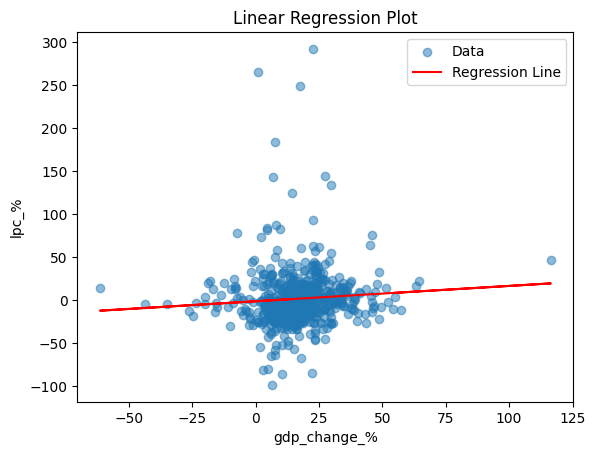

In [8]:
# A more advanced check also giving us the p value and R^2.

df_clean = merged_df.dropna()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()
X = df_clean['gdp_change_%']
y = df_clean['lpc_%']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print(model.summary())


plt.scatter(X['gdp_change_%'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%')
plt.ylabel('lpc_%')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  lpc_%   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.134
Date:                Wed, 06 Mar 2024   Prob (F-statistic):             0.0239
Time:                        16:57:14   Log-Likelihood:                -2485.0
No. Observations:                 536   AIC:                             4974.
Df Residuals:                     534   BIC:                             4983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.5792      1.743     -2.628   

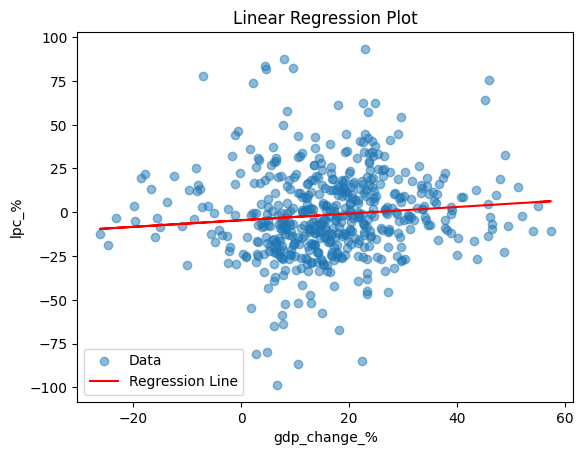

In [10]:
# This time a correlation calculation but without the extreme values. This because extreme values can distort the outcome of a correlation meassurement.
#The extreme's are calculated using the z score and taken out of the df.

df_clean = merged_df.dropna()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()

z_scores_gdp = stats.zscore(df_clean['gdp_change_%'])
z_scores_lpc = stats.zscore(df_clean['lpc_%'])
threshold = 3

merged_df_no_extreme = df_clean[(abs(z_scores_gdp) < threshold) & (abs(z_scores_lpc) < threshold)]

X = merged_df_no_extreme['gdp_change_%']
y = merged_df_no_extreme['lpc_%']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print(model.summary())


plt.scatter(X['gdp_change_%'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%')
plt.ylabel('lpc_%')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [11]:
# Correlation check without the extreme values in the set.

correlation = merged_df_no_extreme['gdp_change_%'].corr(merged_df_no_extreme['lpc_%'])
print(correlation)

0.0975808433161875


Overall, while there appears to be a positive relationship between the percentage change in GDP and the percentage change in people who finished primary school, the low R-squared value and the relatively high p-value indicate that the relationship may not be very strong or statistically significant. 